In [74]:
import netCDF4
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
import matplotlib.path as mpath
%matplotlib inline

FILE1 = "../data/Kinugawa2015/nesting/wrfout_d02_2015-09-08_12:00:00"
FILE2 = "../data/Kinugawa2015/PSISAT2.0/wrfout_d02_2015-09-08_12:00:00"
FILE3 = "../data/Kinugawa2015/SMCMAX2.0/wrfout_d02_2015-09-08_12:00:00"
#FILE = "../data/Kinugawa2015/nesting/wrfout_d02_2015-09-08_12:00:00"
#FILE = "../data/wrfout_single_domain"
#FILE = "../data/wrfout_v2_Lambert.nc"
nc1 = netCDF4.Dataset(FILE1, 'r')
nc2 = netCDF4.Dataset(FILE2, 'r')
nc3 = netCDF4.Dataset(FILE3, 'r')
#nc1.variables

/usr/local/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: Log scale: values of z <= 0 have been masked
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


<Figure size 432x288 with 0 Axes>

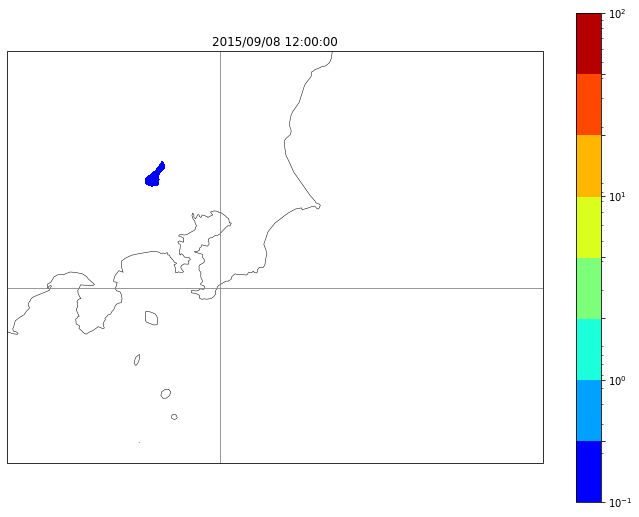

<Figure size 432x288 with 0 Axes>

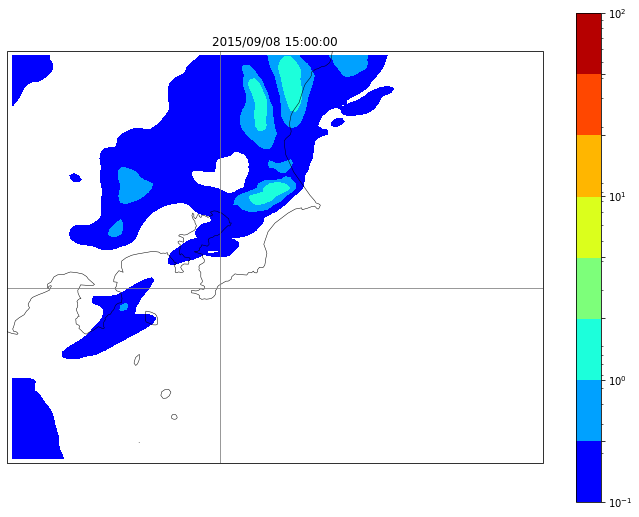

<Figure size 432x288 with 0 Axes>

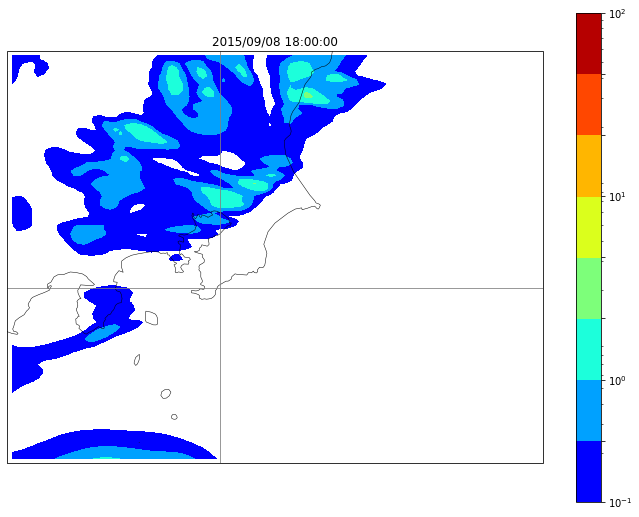

<Figure size 432x288 with 0 Axes>

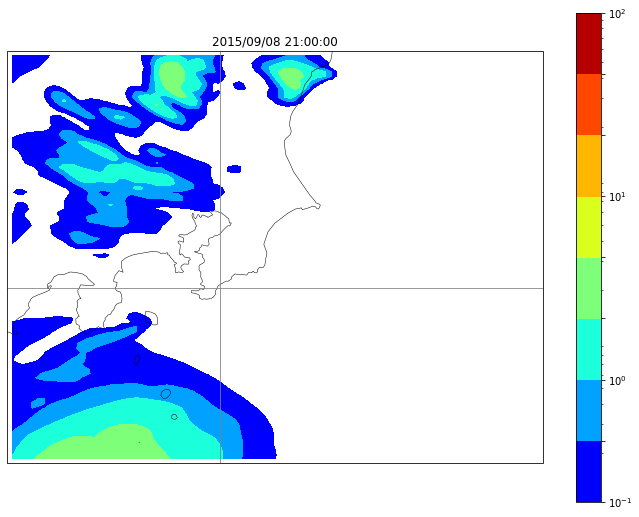

<Figure size 432x288 with 0 Axes>

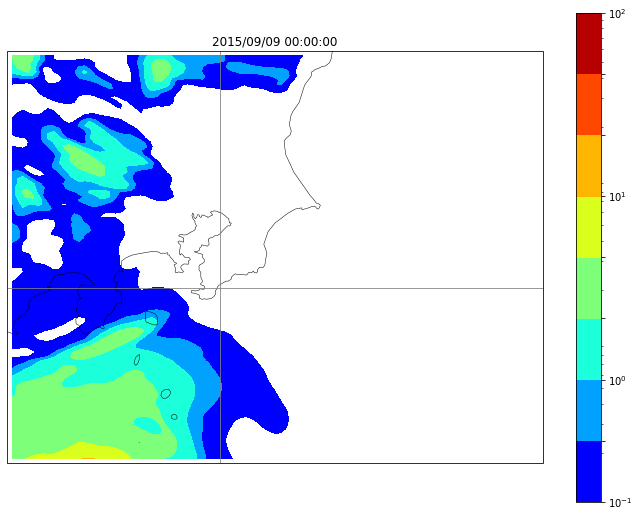

<Figure size 432x288 with 0 Axes>

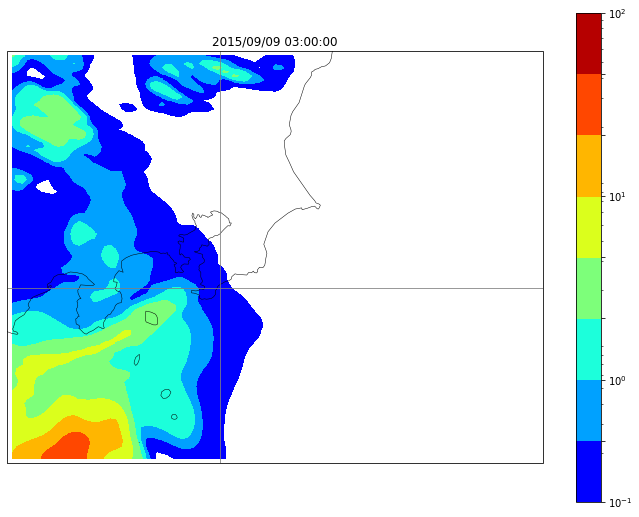

<Figure size 432x288 with 0 Axes>

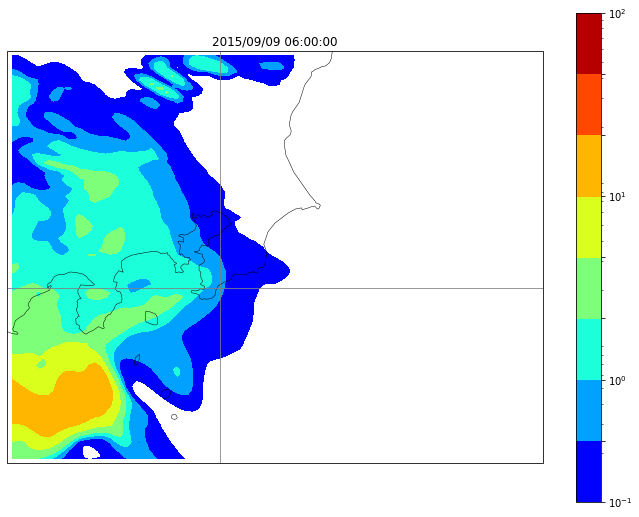

<Figure size 432x288 with 0 Axes>

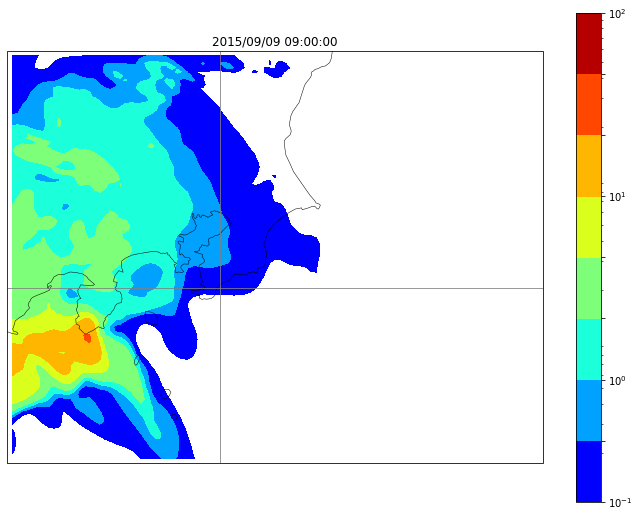

<Figure size 432x288 with 0 Axes>

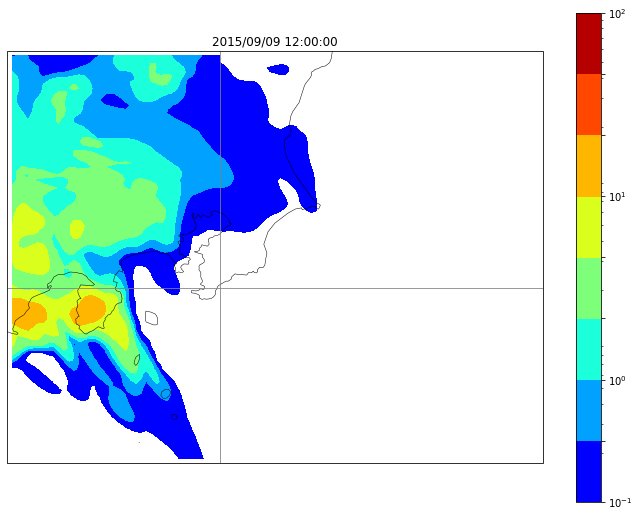

<Figure size 432x288 with 0 Axes>

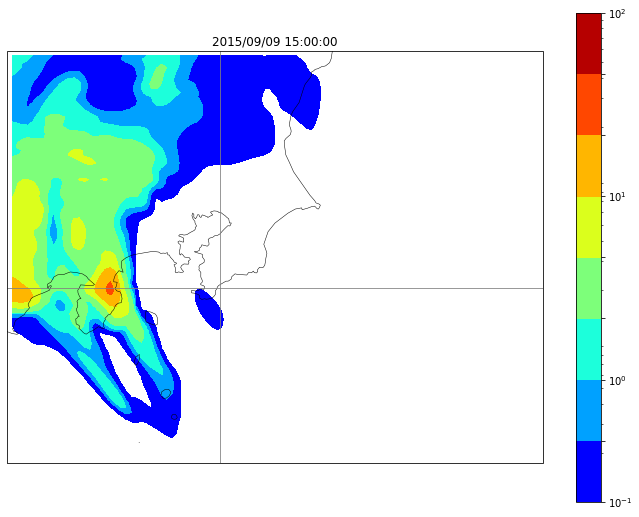

<Figure size 432x288 with 0 Axes>

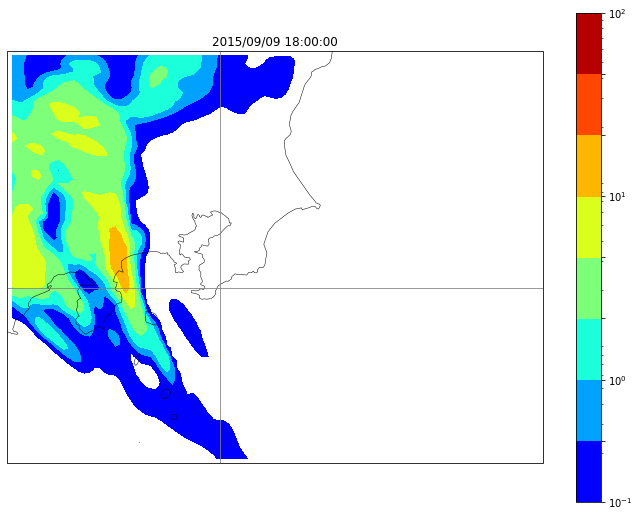

<Figure size 432x288 with 0 Axes>

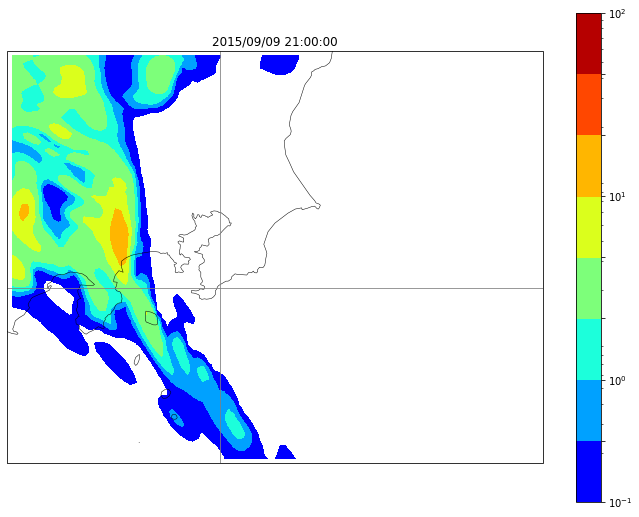

<Figure size 432x288 with 0 Axes>

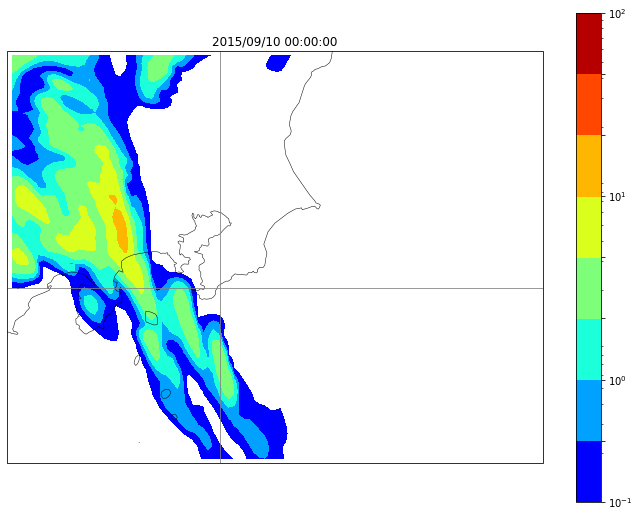

<Figure size 432x288 with 0 Axes>

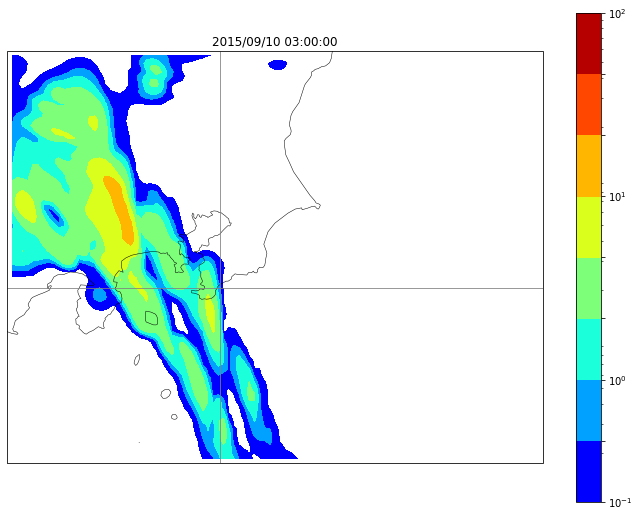

<Figure size 432x288 with 0 Axes>

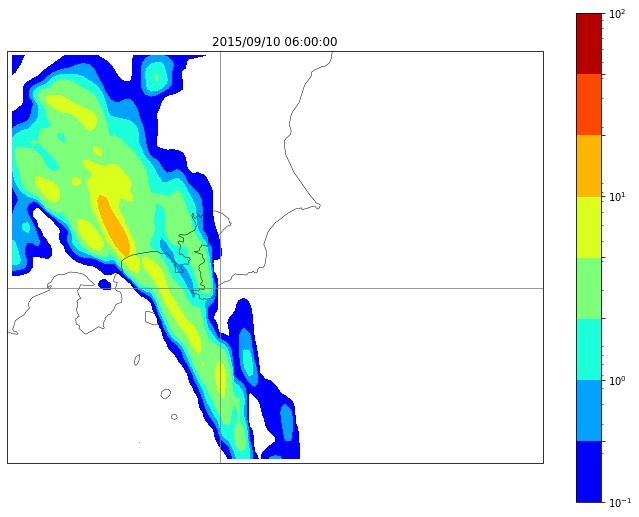

<Figure size 432x288 with 0 Axes>

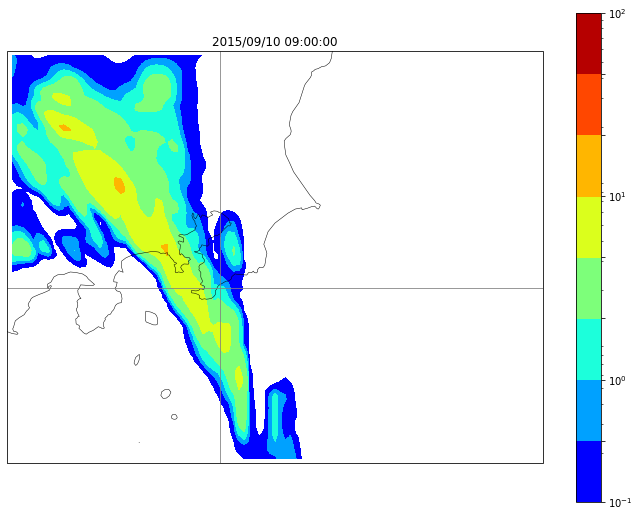

<Figure size 432x288 with 0 Axes>

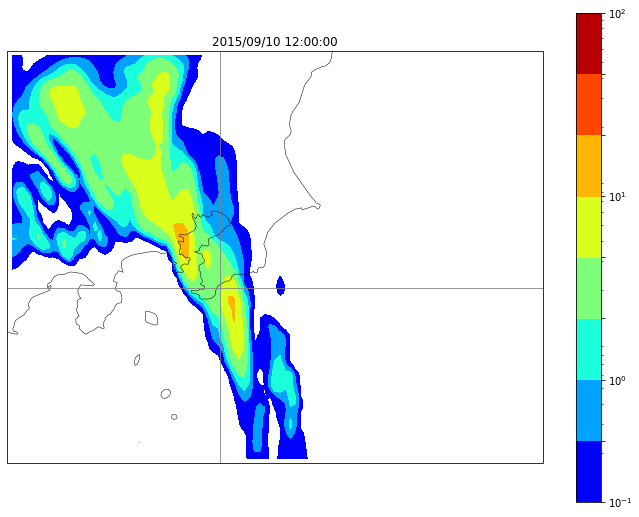

<Figure size 432x288 with 0 Axes>

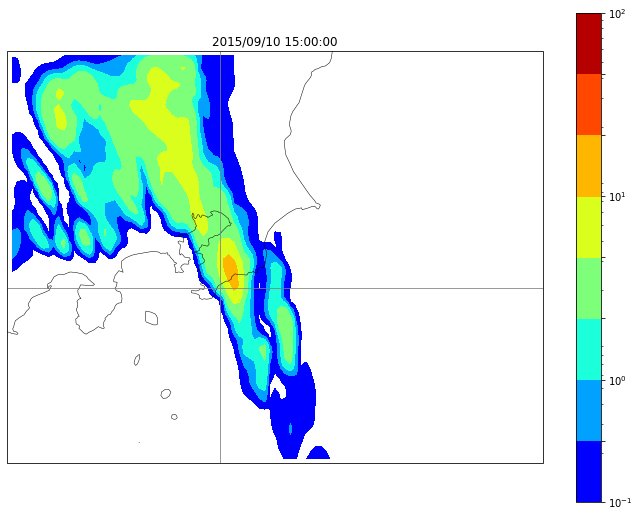

<Figure size 432x288 with 0 Axes>

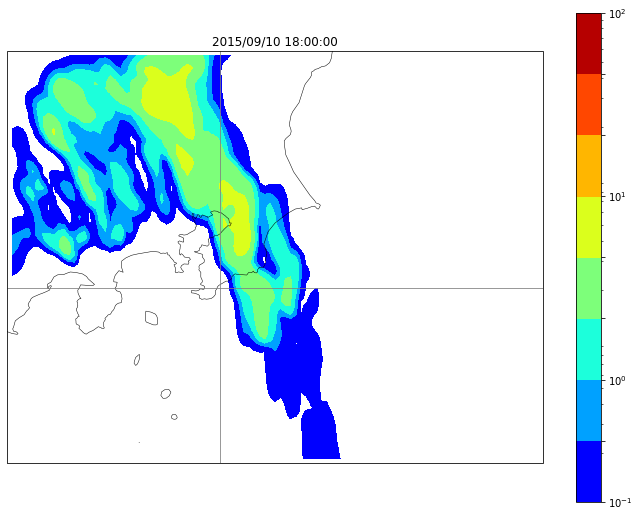

<Figure size 432x288 with 0 Axes>

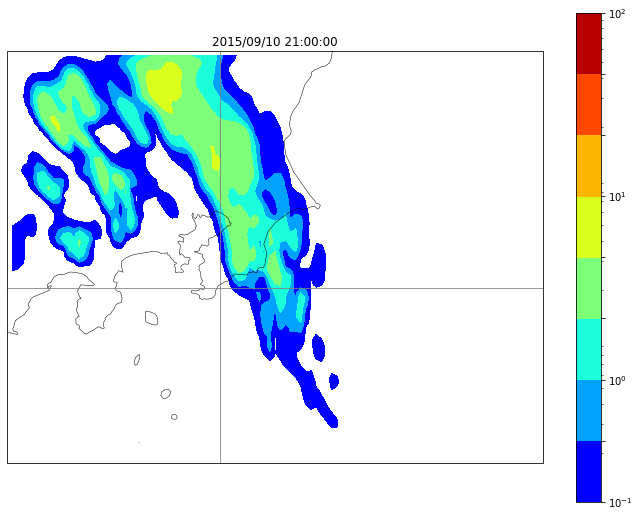

<Figure size 432x288 with 0 Axes>

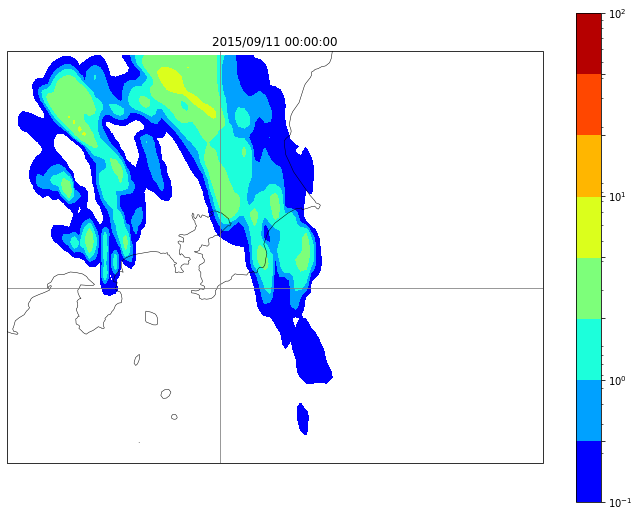

<Figure size 432x288 with 0 Axes>

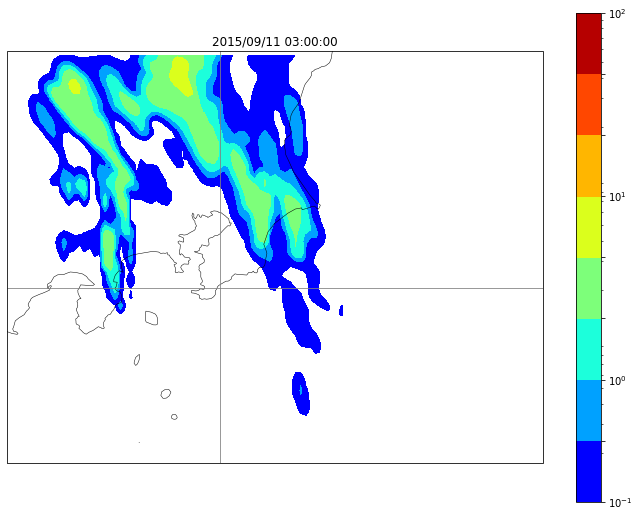

<Figure size 432x288 with 0 Axes>

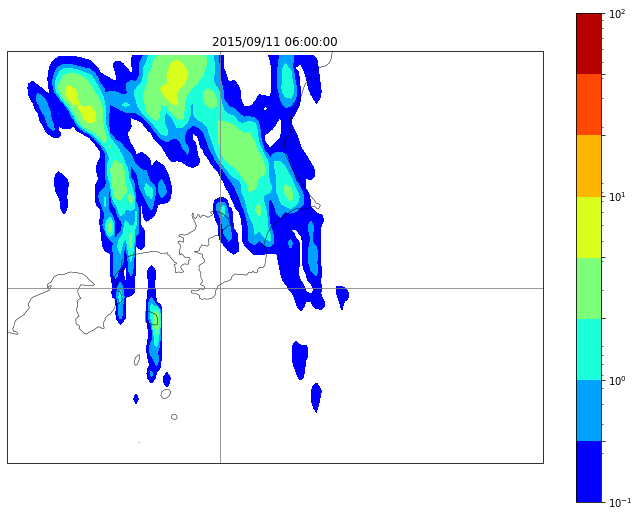

<Figure size 432x288 with 0 Axes>

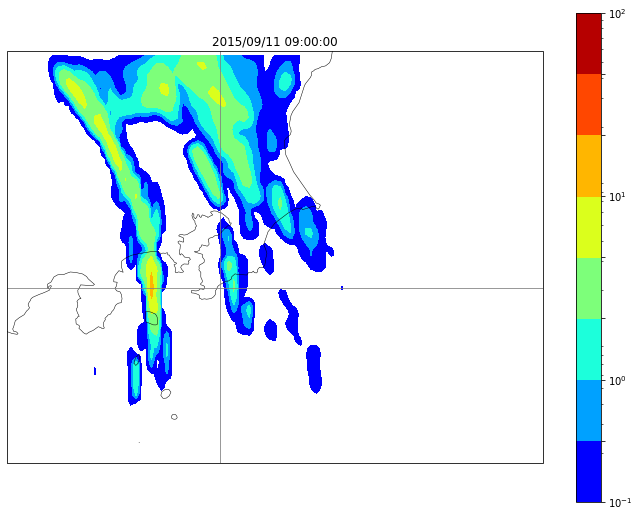

In [75]:
from matplotlib import colorbar
from matplotlib.colors import LogNorm
import datetime

lats = nc1["XLAT"][0]
lons = nc1["XLONG"][0]
lon_c = nc1.CEN_LON
lat_c = nc1.CEN_LAT

def draw(data1, figtitle="", savetitle=""):
    plt.clf()
    fig = plt.figure(figsize=(12,9))
    #Mercator
    ax = plt.axes(projection=ccrs.PlateCarree())

    #Lambert
    #ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=lon_c,
    #                                               central_latitude=lat_c,
    #                                               standard_parallels=(30,60)))
    ax.set_extent([lons[0][0],lons[-1][-1],lats[0][-1],lats[-1][0]],ccrs.PlateCarree())
    ax.coastlines(resolution='10m', lw=0.5)
    ax.gridlines(xlocs=mticker.MultipleLocator(5), 
             ylocs=mticker.MultipleLocator(5), 
             linestyle='-', 
             color='gray')
    levels=[0.1, 0.5,1.0,2.0,5.0,10.0,20.0,50.0,100.0]
    cs = ax.contourf(lons, lats, precp, transform=ccrs.PlateCarree(), levels=levels, vmin=0.1, vmax=100, norm=LogNorm(), cmap='jet')
    cbar = plt.colorbar(cs)
    plt.title(figtitle)
    #plt.savefig(savetitle)
    plt.show()
    
    
for i in range(24):
    precp = (nc1.variables["RAINNC"][i+1] - nc1.variables["RAINNC"][i]) / 3
    start_date = datetime.datetime(2015, 9, 8, 12, 0, 0)
    savepath = "./out/kinugawa_nesting_d01/kinugawa_15km_{:03}.png".format(i)
    figtitle = (start_date +  datetime.timedelta(hours=i*3)).strftime("%Y/%m/%d %H:%M:%S")
    draw(precp, figtitle, savepath)

### パラメータを変えての比較
雨量の比較

<Figure size 432x288 with 0 Axes>

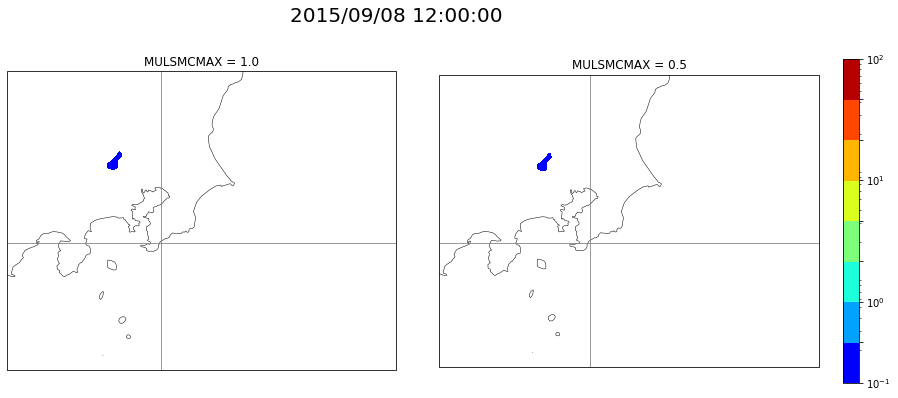

<Figure size 432x288 with 0 Axes>

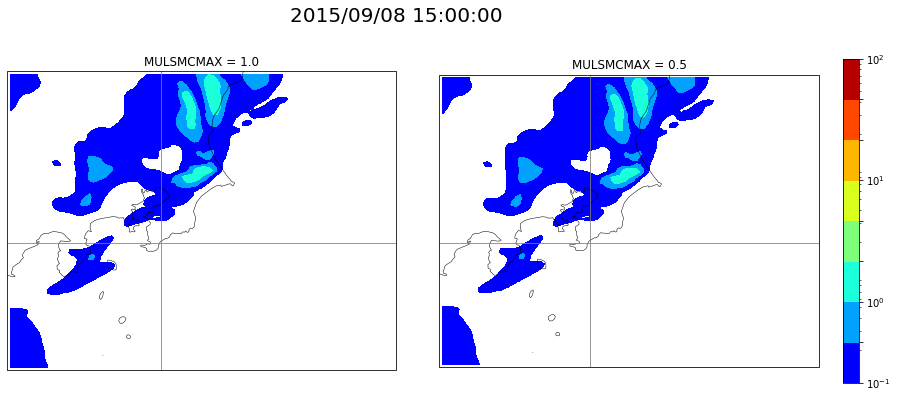

<Figure size 432x288 with 0 Axes>

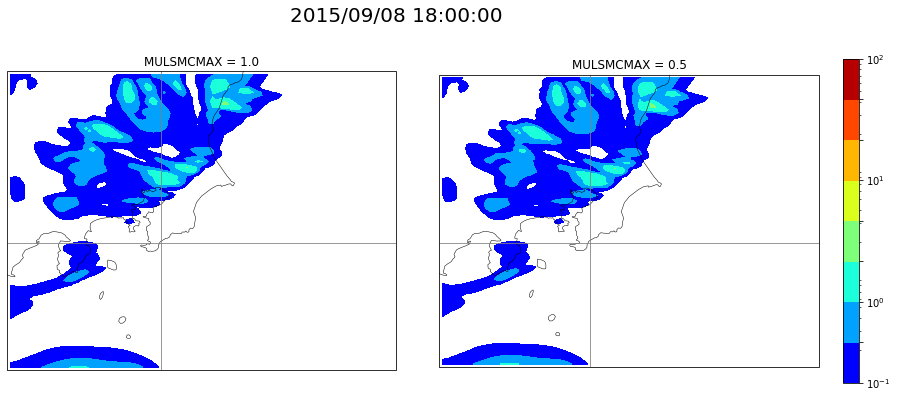

<Figure size 432x288 with 0 Axes>

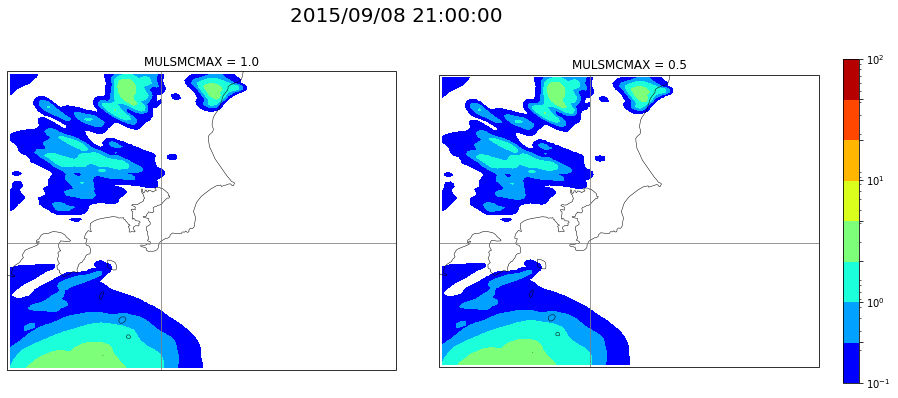

<Figure size 432x288 with 0 Axes>

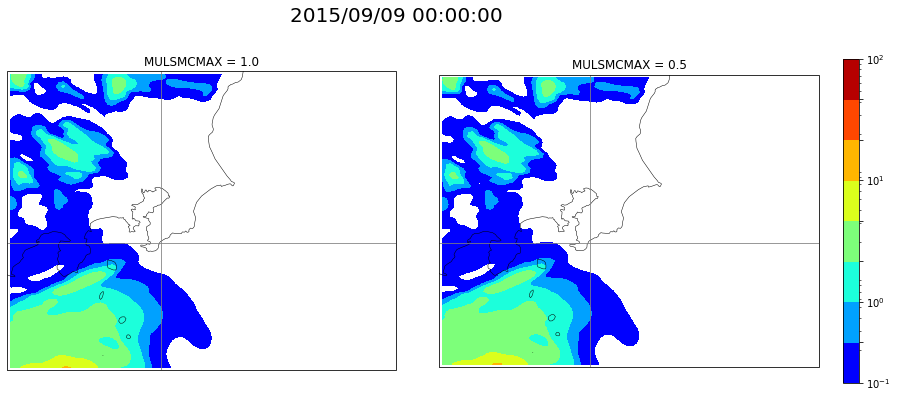

<Figure size 432x288 with 0 Axes>

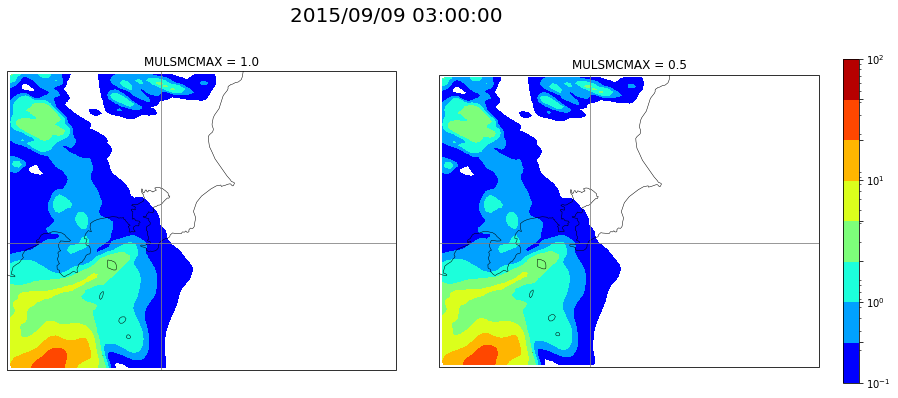

<Figure size 432x288 with 0 Axes>

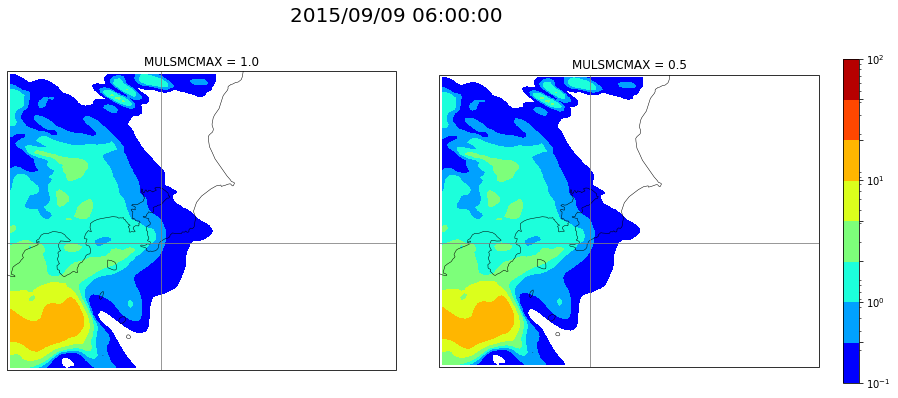

<Figure size 432x288 with 0 Axes>

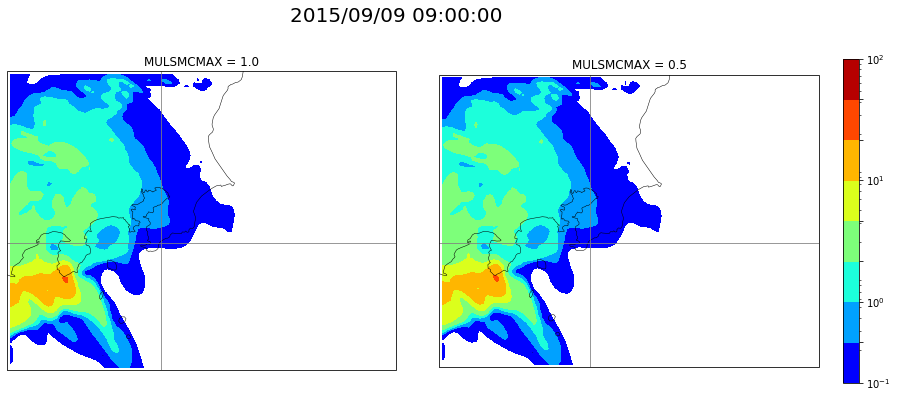

<Figure size 432x288 with 0 Axes>

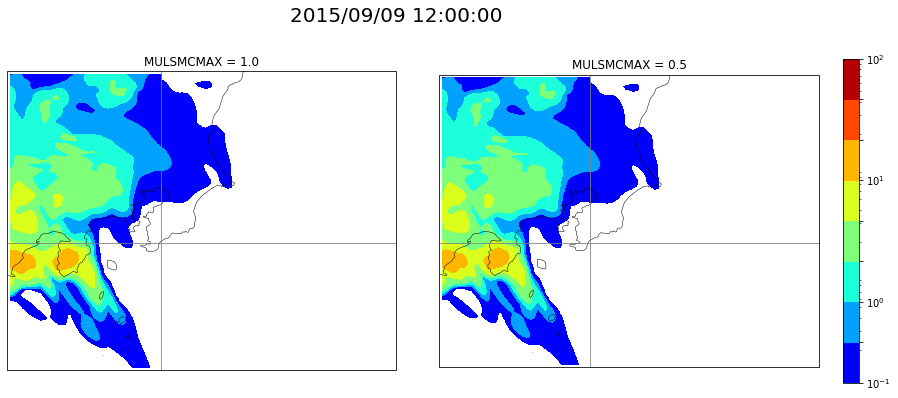

<Figure size 432x288 with 0 Axes>

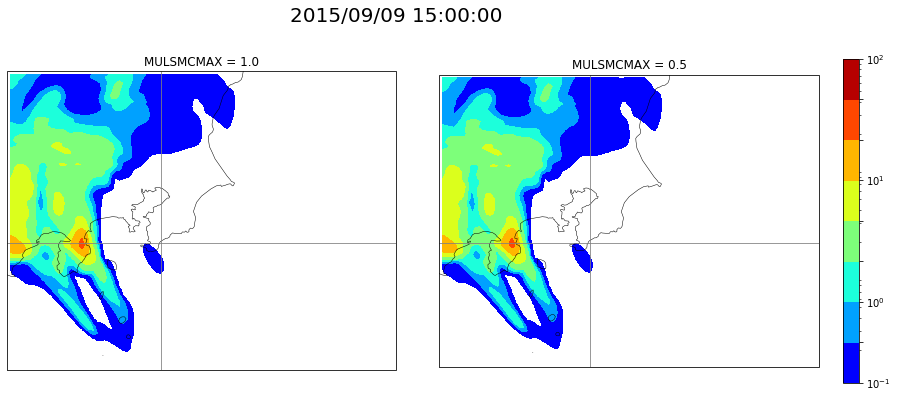

<Figure size 432x288 with 0 Axes>

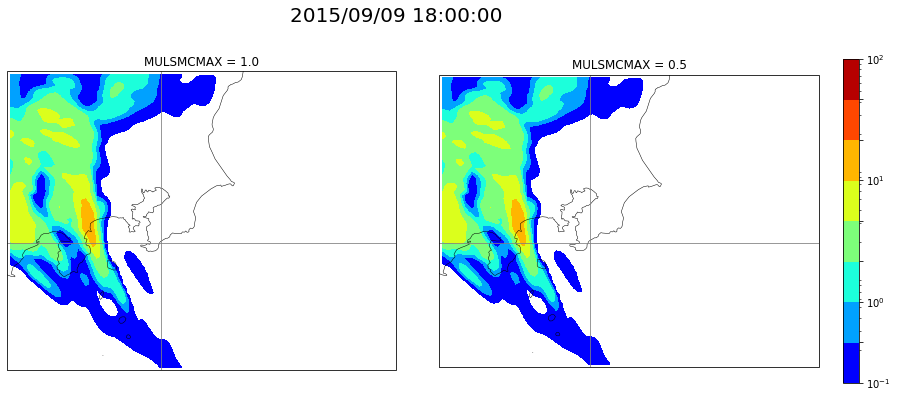

<Figure size 432x288 with 0 Axes>

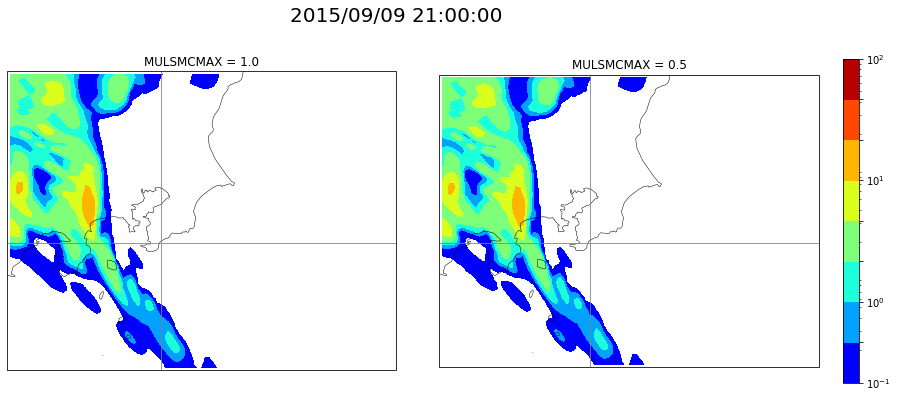

<Figure size 432x288 with 0 Axes>

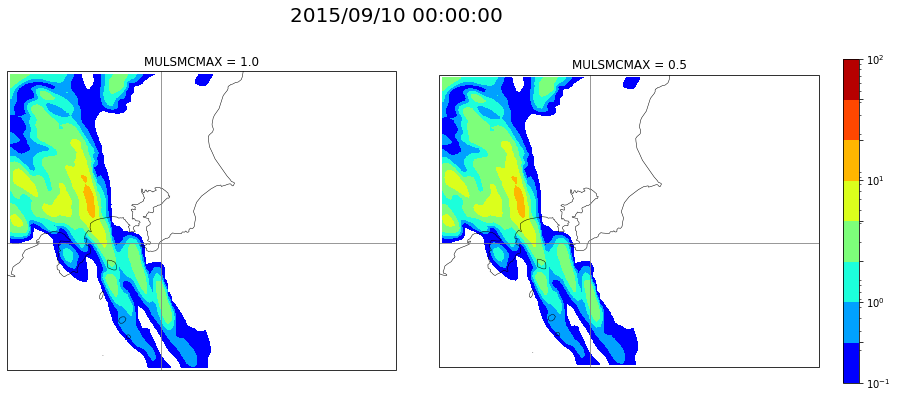

<Figure size 432x288 with 0 Axes>

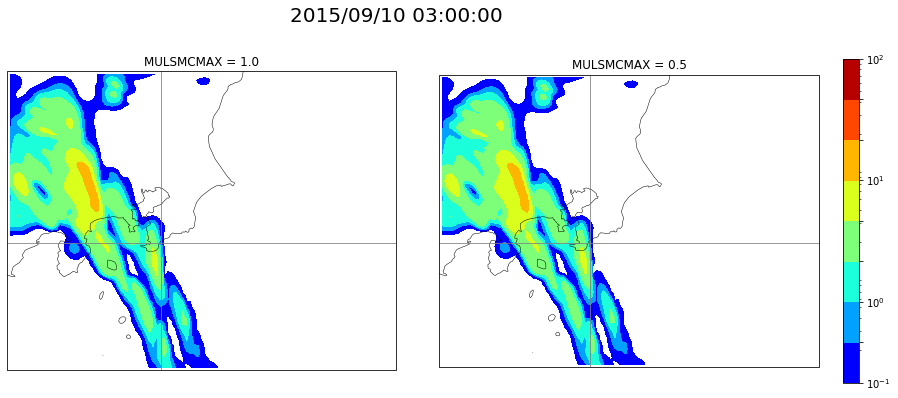

<Figure size 432x288 with 0 Axes>

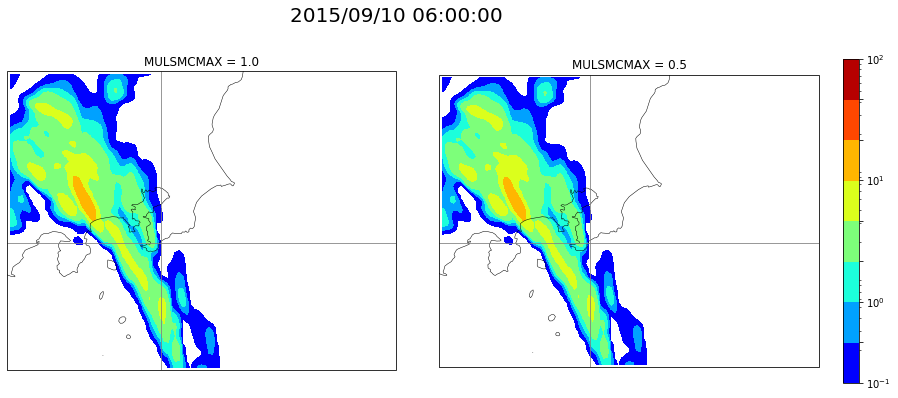

<Figure size 432x288 with 0 Axes>

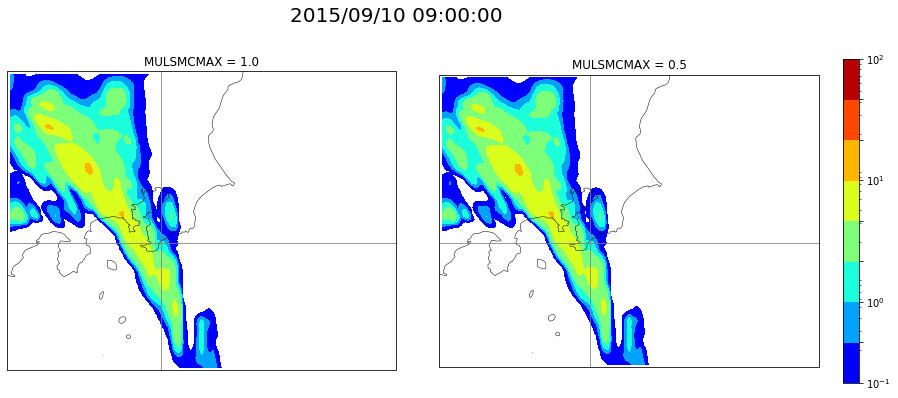

<Figure size 432x288 with 0 Axes>

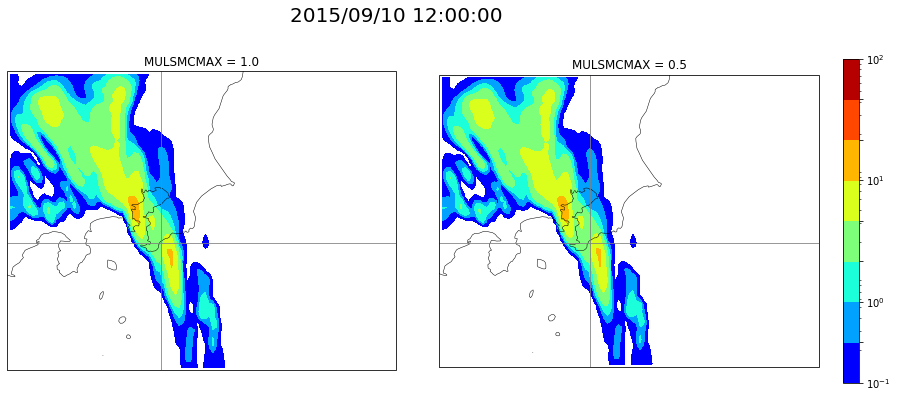

<Figure size 432x288 with 0 Axes>

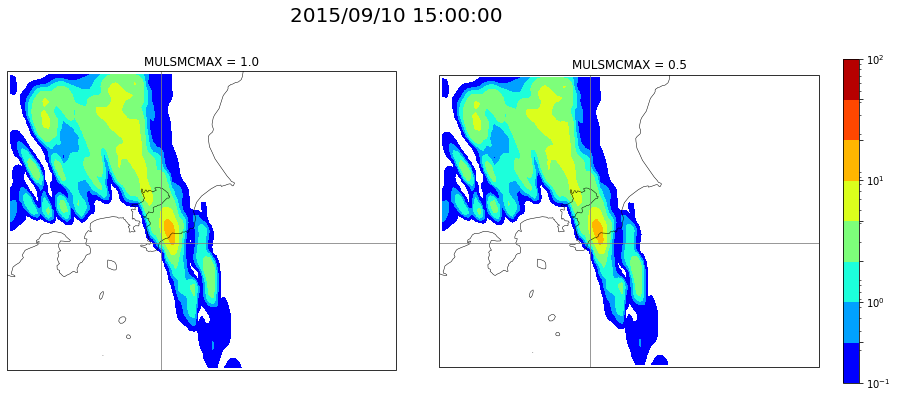

<Figure size 432x288 with 0 Axes>

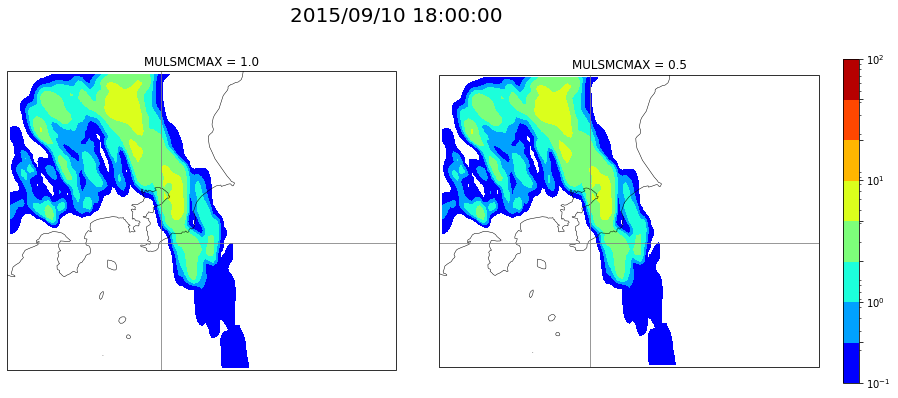

<Figure size 432x288 with 0 Axes>

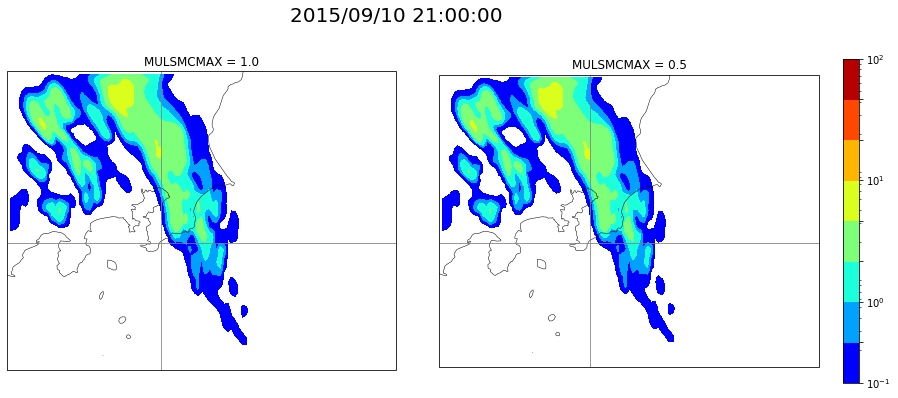

<Figure size 432x288 with 0 Axes>

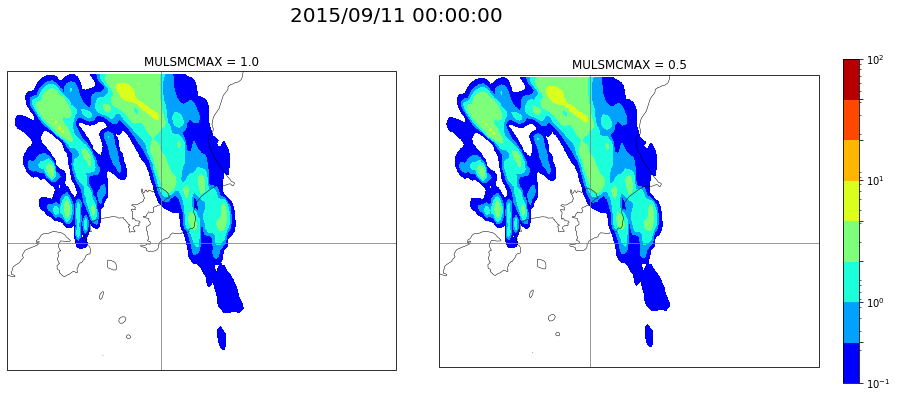

<Figure size 432x288 with 0 Axes>

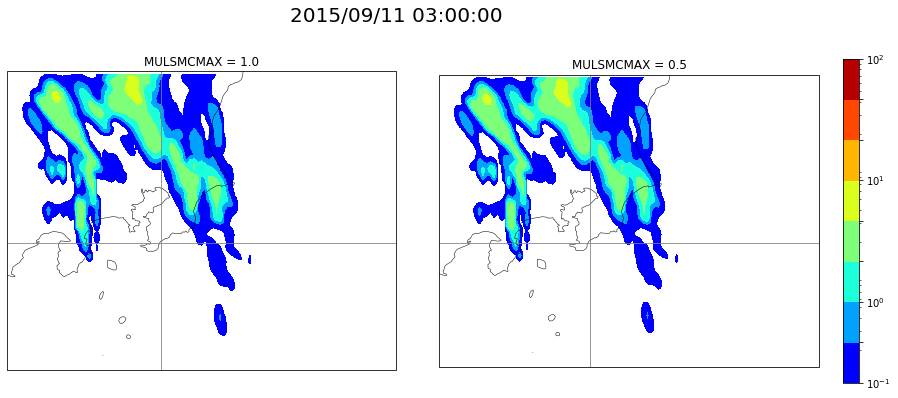

<Figure size 432x288 with 0 Axes>

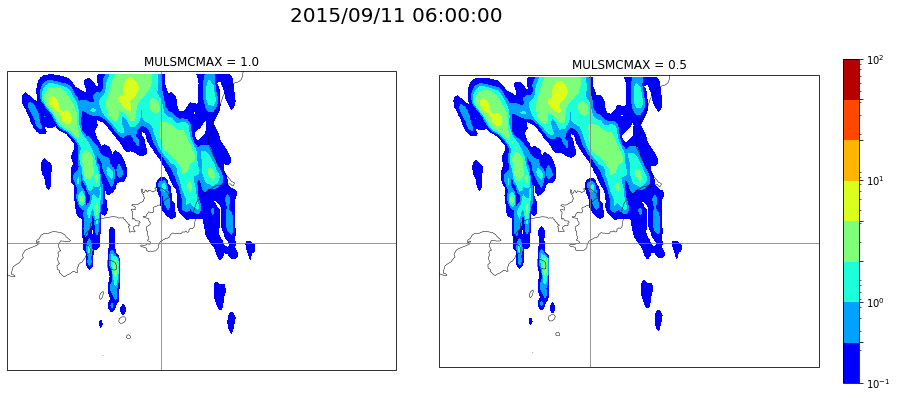

<Figure size 432x288 with 0 Axes>

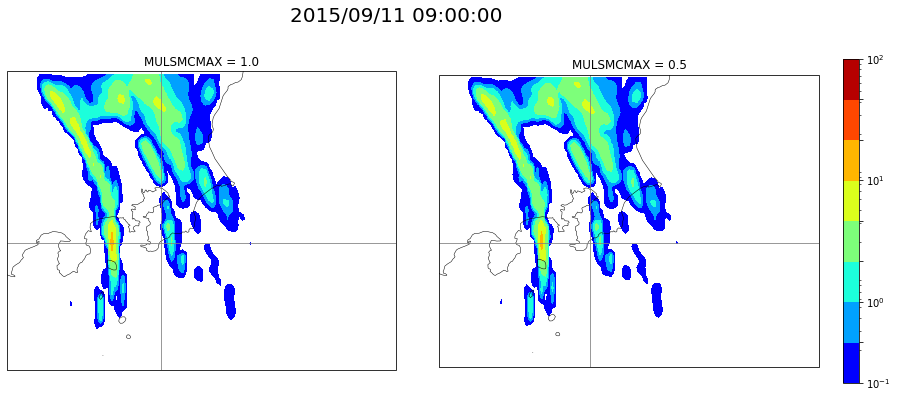

In [76]:
from matplotlib import colorbar
from matplotlib.colors import LogNorm
import datetime

lats = nc1["XLAT"][0]
lons = nc1["XLONG"][0]
lon_c = nc1.CEN_LON
lat_c = nc1.CEN_LAT

def draw(data1, data2, figtitle="", savetitle=""):
    levels=[0.1, 0.5,1.0,2.0,5.0,10.0,20.0,50.0,100.0]
    plt.clf()
    fig = plt.figure(figsize=(12,9))
    
    #Mercator
    ax1 = plt.axes([0, 0.1, 0.45, 1], projection=ccrs.PlateCarree())
    ax2 = plt.axes([0.5, 0.1, 0.55, 1], projection=ccrs.PlateCarree())

    #Lambert
    #ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=lon_c,
    #                                               central_latitude=lat_c,
    #                                               standard_parallels=(30,60)))
    
    ax1.set_extent([lons[0][0],lons[-1][-1],lats[0][-1],lats[-1][0]],ccrs.PlateCarree())
    ax1.coastlines(resolution='10m', lw=0.5)
    ax1.gridlines(xlocs=mticker.MultipleLocator(5), 
             ylocs=mticker.MultipleLocator(5), 
             linestyle='-', 
             color='gray')
    cs1 = ax1.contourf(lons, lats, data1, transform=ccrs.PlateCarree(), levels=levels, vmin=0.1, vmax=100, norm=LogNorm(), cmap='jet')
    ax1.set_title("MULSMCMAX = 1.0")
    
    ax2.set_extent([lons[0][0],lons[-1][-1],lats[0][-1],lats[-1][0]],ccrs.PlateCarree())
    ax2.coastlines(resolution='10m', lw=0.5)
    ax2.gridlines(xlocs=mticker.MultipleLocator(5), 
             ylocs=mticker.MultipleLocator(5), 
             linestyle='-', 
             color='gray')
    cs2 = ax2.contourf(lons, lats, data2, transform=ccrs.PlateCarree(), levels=levels, vmin=0.1, vmax=100, norm=LogNorm(), cmap='jet')
    ax2.set_title("MULSMCMAX = 0.5")
    

    cbar = plt.colorbar(cs2, shrink=0.5)
    fig.suptitle(figtitle, fontsize=20, x=0.45, y=0.93)

    #plt.savefig(savetitle)
    plt.show()
    
for i in range(24):
    data1 = (nc1.variables["RAINNC"][i+1] - nc1.variables["RAINNC"][i]) / 3
    data2 = (nc2.variables["RAINNC"][i+1] - nc2.variables["RAINNC"][i]) / 3
    start_date = datetime.datetime(2015, 9, 8, 12, 0, 0)
    savepath = "./out/kinugawa_nesting_d01/kinugawa_15km_{:03}.png".format(i)
    figtitle = (start_date +  datetime.timedelta(hours=i*3)).strftime("%Y/%m/%d %H:%M:%S")
    draw(data1, data2, figtitle, savepath)

蒸発量 (地表面潜熱フラックス) による比較

<Figure size 432x288 with 0 Axes>

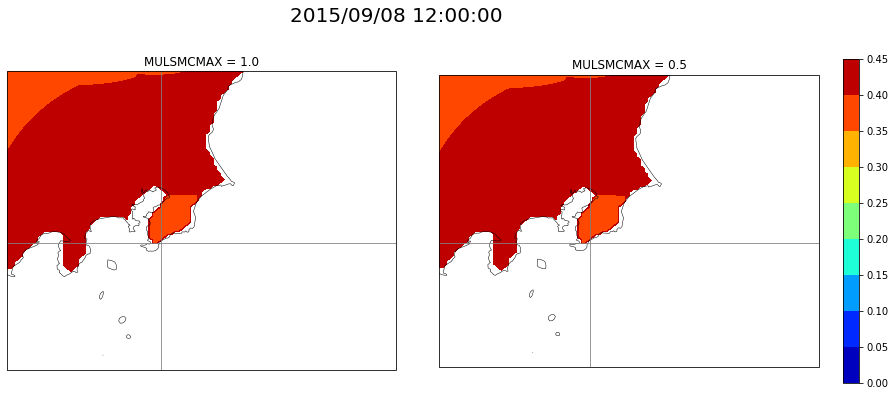

<Figure size 432x288 with 0 Axes>

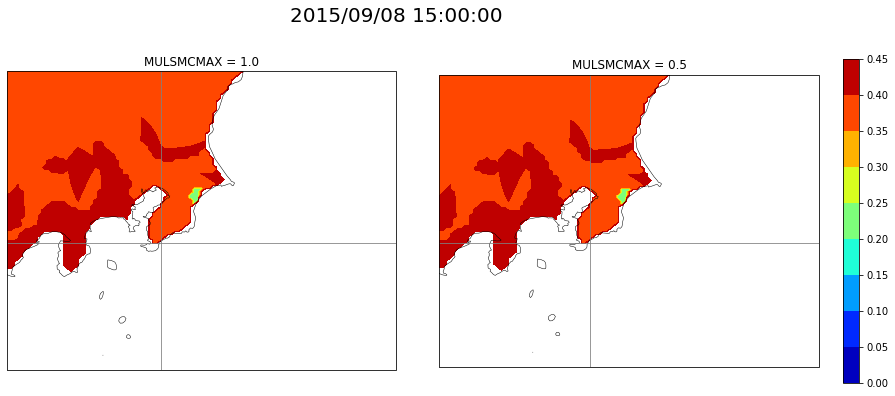

<Figure size 432x288 with 0 Axes>

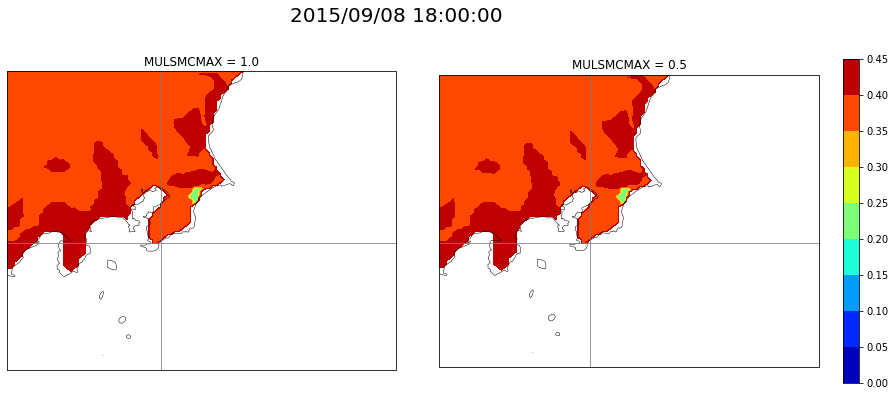

<Figure size 432x288 with 0 Axes>

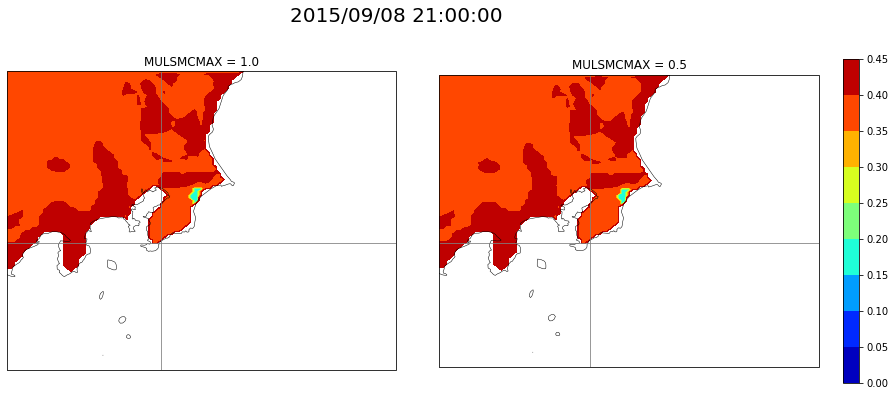

<Figure size 432x288 with 0 Axes>

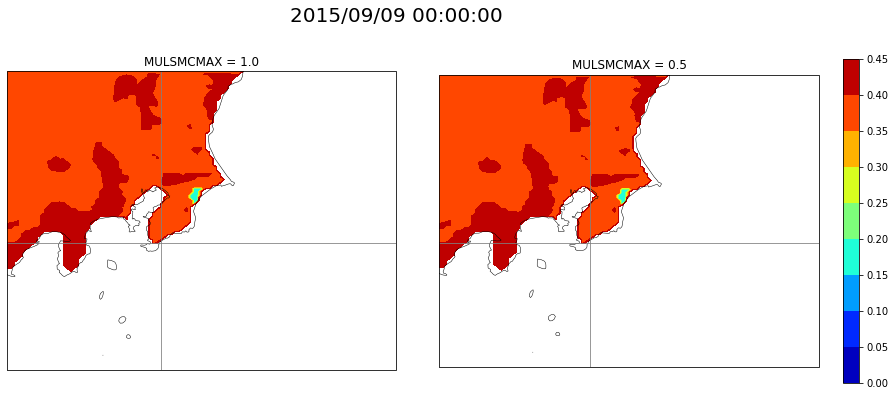

<Figure size 432x288 with 0 Axes>

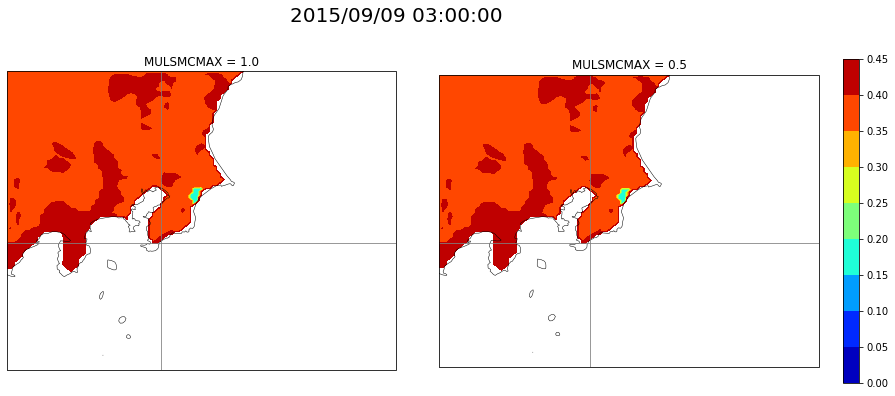

<Figure size 432x288 with 0 Axes>

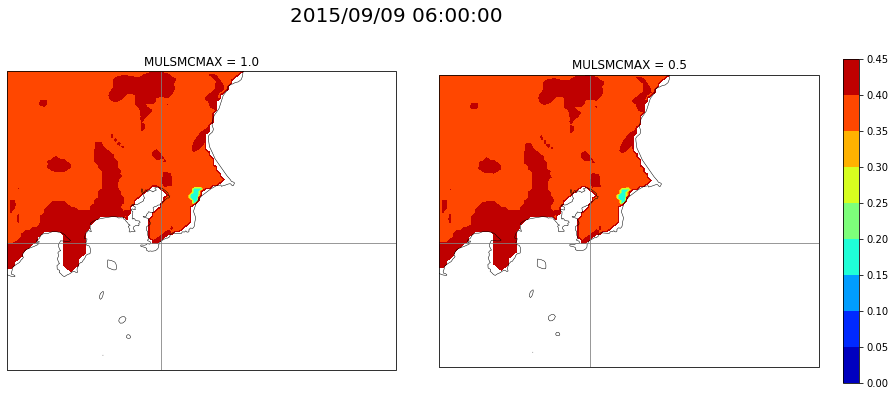

<Figure size 432x288 with 0 Axes>

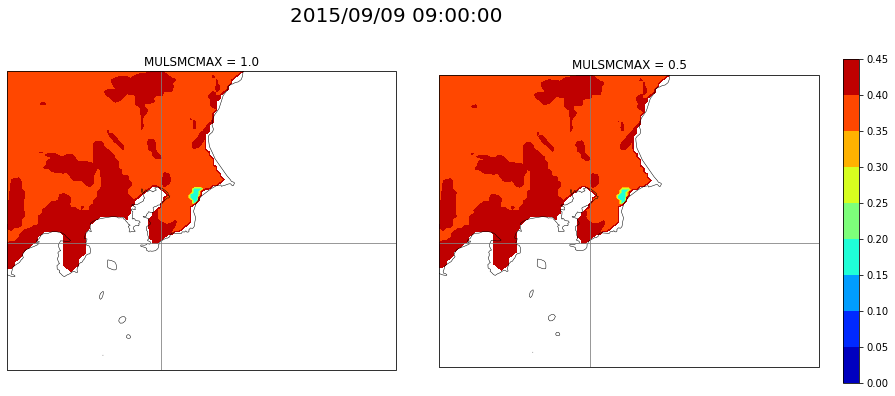

<Figure size 432x288 with 0 Axes>

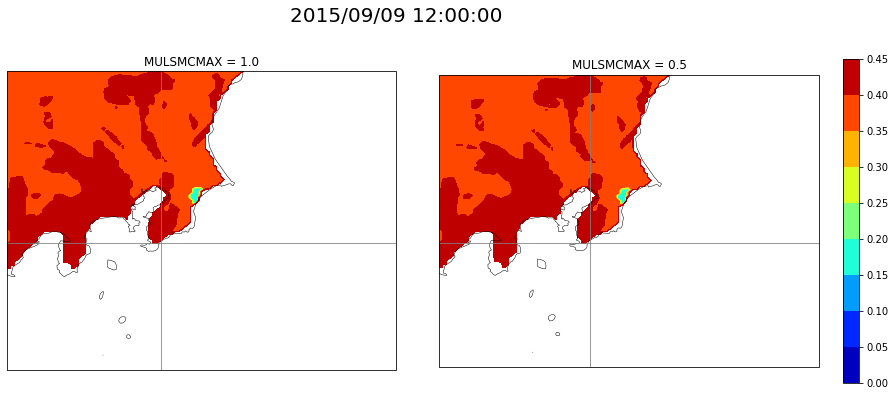

<Figure size 432x288 with 0 Axes>

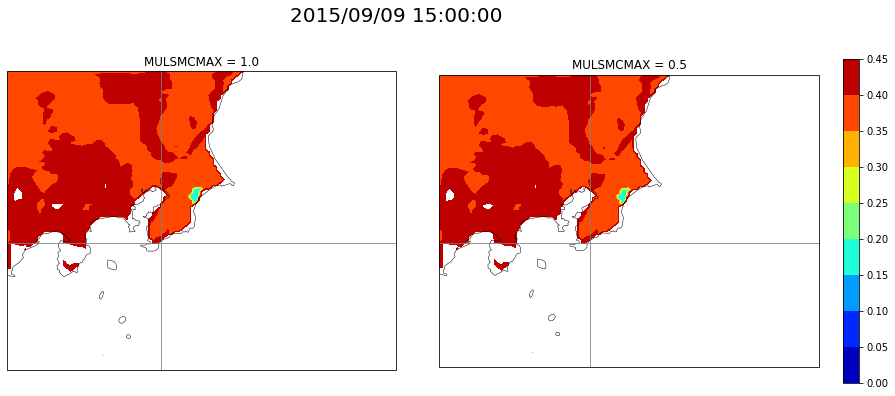

<Figure size 432x288 with 0 Axes>

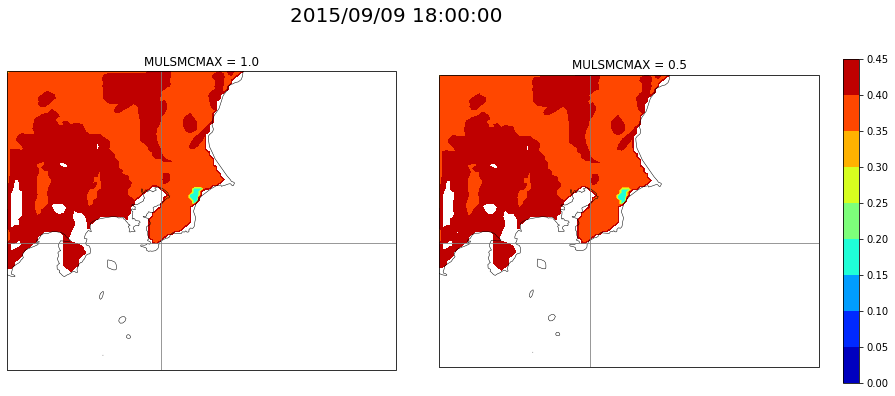

<Figure size 432x288 with 0 Axes>

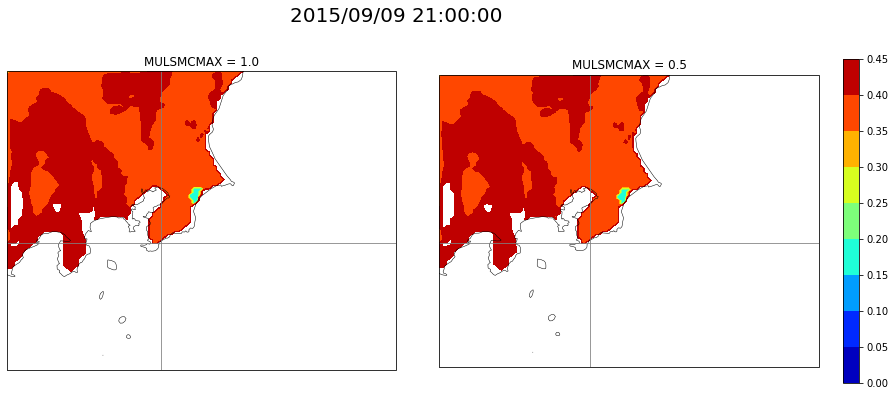

<Figure size 432x288 with 0 Axes>

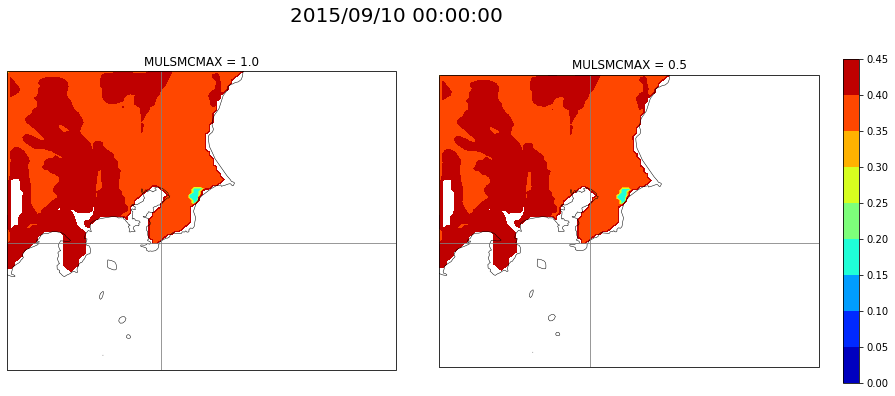

<Figure size 432x288 with 0 Axes>

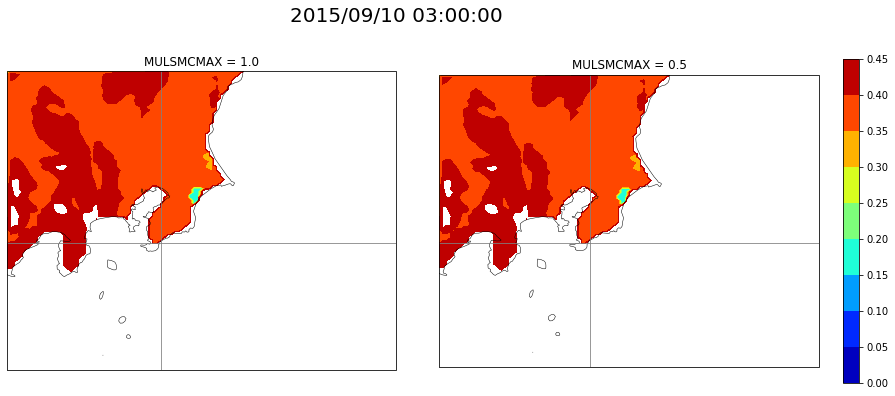

<Figure size 432x288 with 0 Axes>

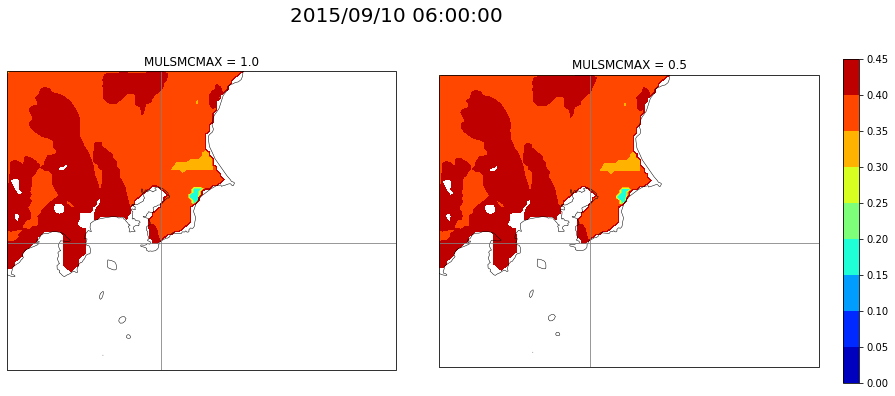

<Figure size 432x288 with 0 Axes>

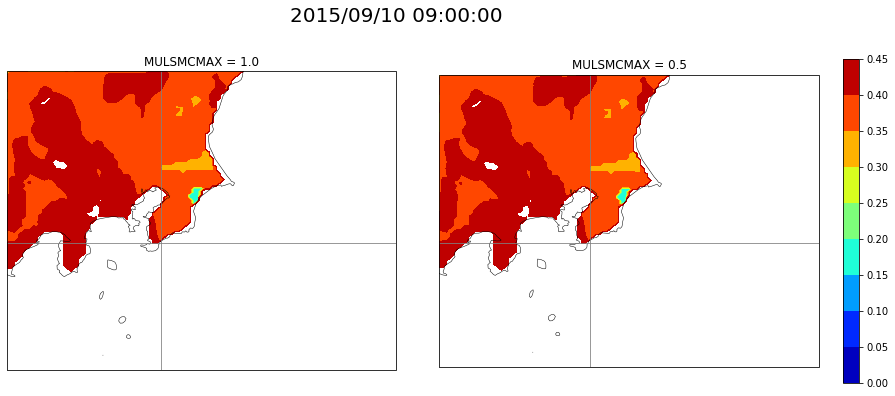

<Figure size 432x288 with 0 Axes>

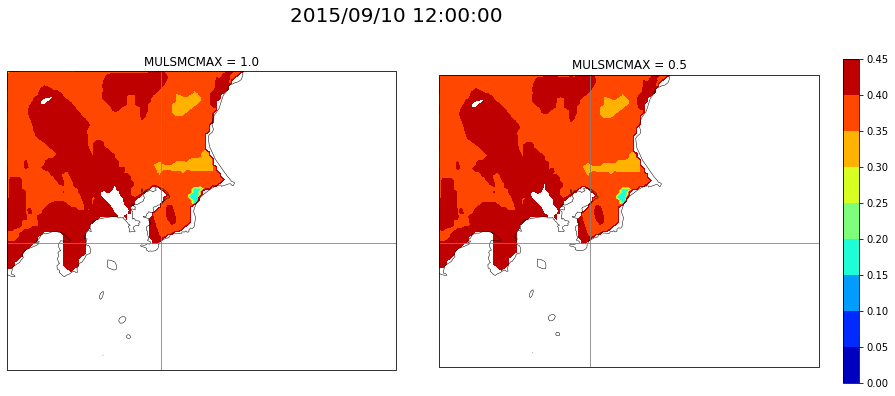

<Figure size 432x288 with 0 Axes>

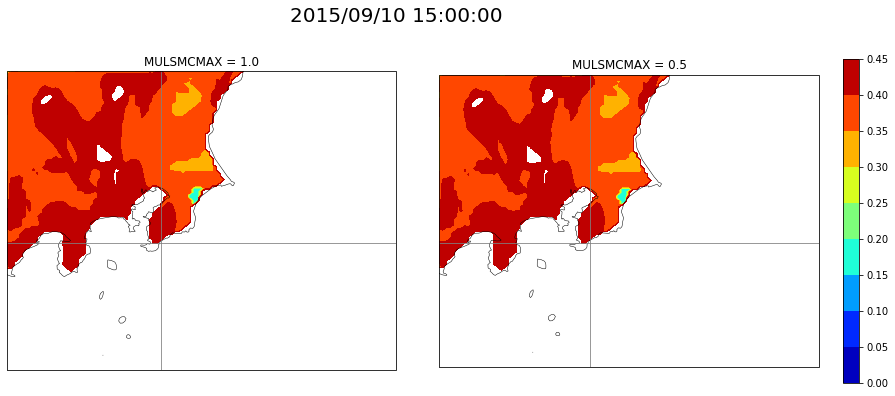

<Figure size 432x288 with 0 Axes>

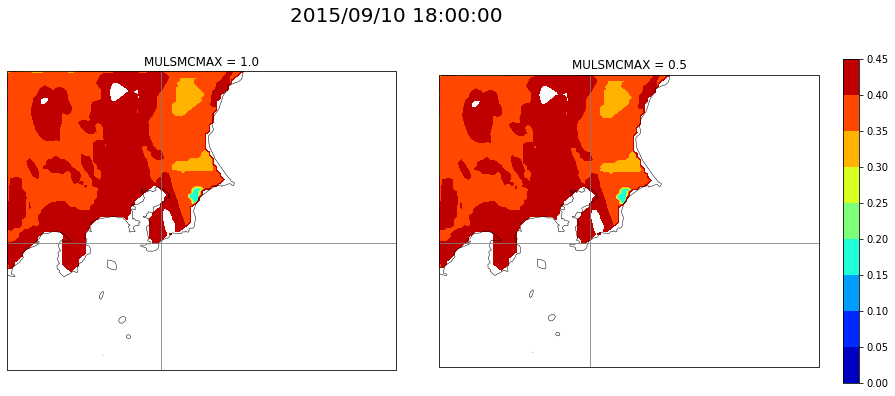

<Figure size 432x288 with 0 Axes>

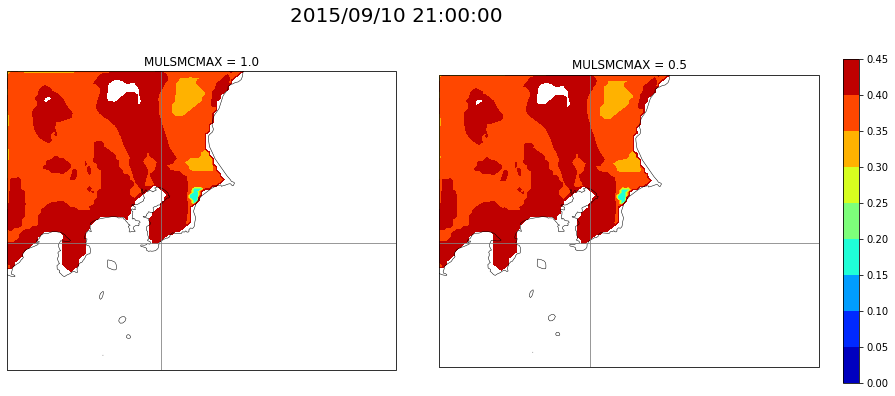

<Figure size 432x288 with 0 Axes>

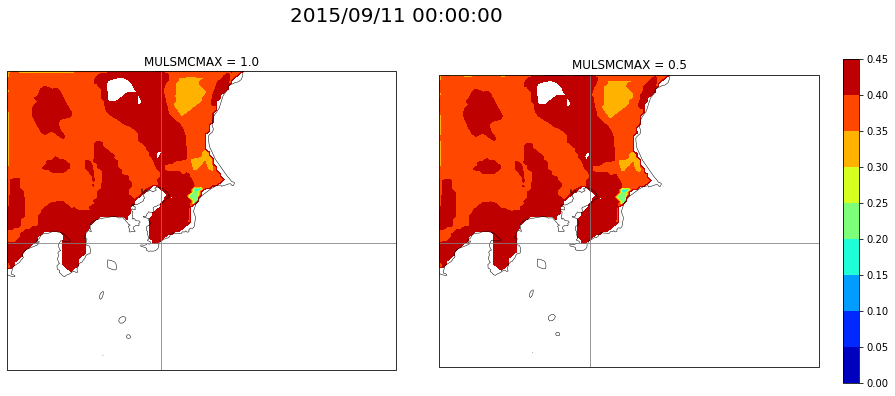

<Figure size 432x288 with 0 Axes>

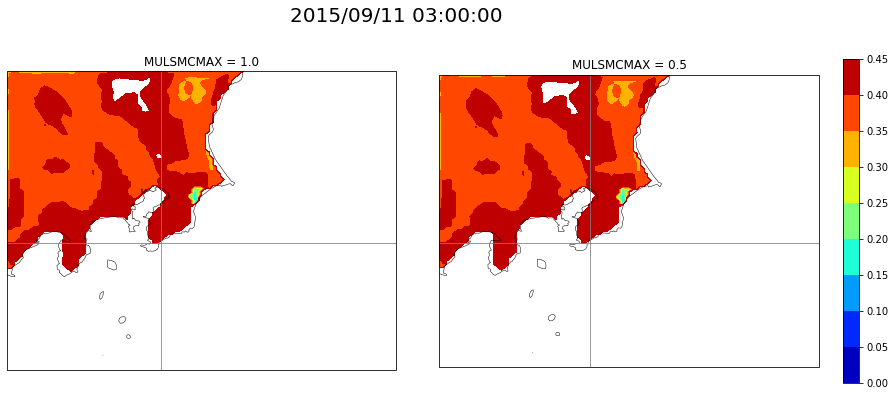

<Figure size 432x288 with 0 Axes>

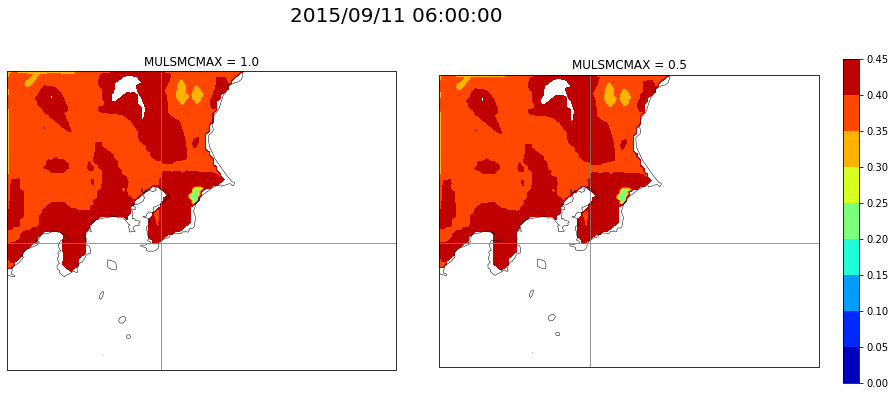

<Figure size 432x288 with 0 Axes>

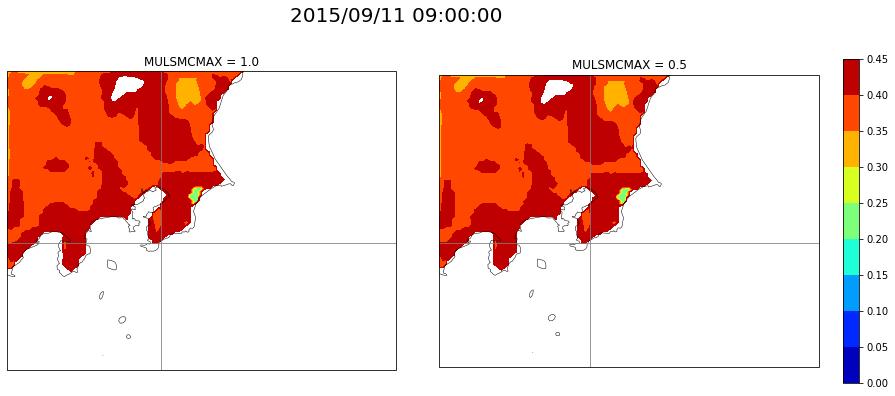

In [78]:
from matplotlib import colorbar
from matplotlib.colors import LogNorm
import datetime

lats = nc1["XLAT"][0]
lons = nc1["XLONG"][0]
lon_c = nc1.CEN_LON
lat_c = nc1.CEN_LAT

def draw(data1, data2, figtitle="", savetitle=""):
    levels=np.arange(0, 0.5, 0.05)
    plt.clf()
    fig = plt.figure(figsize=(12,9))
    
    #Mercator
    ax1 = plt.axes([0, 0.1, 0.45, 1], projection=ccrs.PlateCarree())
    ax2 = plt.axes([0.5, 0.1, 0.55, 1], projection=ccrs.PlateCarree())

    ax1.set_extent([lons[0][0],lons[-1][-1],lats[0][-1],lats[-1][0]],ccrs.PlateCarree())
    ax1.coastlines(resolution='10m', lw=0.5)
    ax1.gridlines(xlocs=mticker.MultipleLocator(5), 
             ylocs=mticker.MultipleLocator(5), 
             linestyle='-', 
             color='gray')
    cs1 = ax1.contourf(lons, lats, data1, transform=ccrs.PlateCarree(), levels=levels, vmin=levels[0], vmax=levels[-1], cmap='jet')
    ax1.set_title("MULSMCMAX = 1.0")
    
    ax2.set_extent([lons[0][0],lons[-1][-1],lats[0][-1],lats[-1][0]],ccrs.PlateCarree())
    ax2.coastlines(resolution='10m', lw=0.5)
    ax2.gridlines(xlocs=mticker.MultipleLocator(5), 
             ylocs=mticker.MultipleLocator(5), 
             linestyle='-', 
             color='gray')
    cs2 = ax2.contourf(lons, lats, data2, transform=ccrs.PlateCarree(), levels=levels, vmin=levels[0], vmax=levels[-1], cmap='jet')
    ax2.set_title("MULSMCMAX = 0.5")
    

    cbar = plt.colorbar(cs2, shrink=0.5)
    fig.suptitle(figtitle, fontsize=20, x=0.45, y=0.93)

    #plt.savefig(savetitle)
    plt.show()
    
for i in range(24):
    data1 = nc1.variables["SMOIS"][i][0]
    data2 = nc2.variables["SMOIS"][i][0]
    start_date = datetime.datetime(2015, 9, 8, 12, 0, 0)
    savepath = "./out/kinugawa_nesting_d01/kinugawa_15km_{:03}.png".format(i)
    figtitle = (start_date +  datetime.timedelta(hours=i*3)).strftime("%Y/%m/%d %H:%M:%S")
    draw(data1, data2, figtitle, savepath)